In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from TrackReconstruction_functions import *
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors 
from matplotlib.ticker import ScalarFormatter

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
# diff = "nodiff"
diff="5percent"


nubb_meta_1bar  = pd.read_hdf(f"../data/Trackreco/ATPC_0nubb_1bar_{diff}_reco.h5",  "meta")
nubb_meta_5bar  = pd.read_hdf(f"../data/Trackreco/ATPC_0nubb_5bar_{diff}_reco.h5",  "meta")
nubb_meta_10bar = pd.read_hdf(f"../data/Trackreco/ATPC_0nubb_10bar_{diff}_reco.h5", "meta")
nubb_meta_15bar = pd.read_hdf(f"../data/Trackreco/ATPC_0nubb_15bar_{diff}_reco.h5", "meta")
nubb_meta_25bar = pd.read_hdf(f"../data/Trackreco/ATPC_0nubb_25bar_{diff}_reco.h5", "meta")
# display(nubb_meta_1bar)
# display(nubb_meta_5bar)

Tl_meta_1bar  = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_1bar_{diff}_reco.h5",  "meta")
Tl_meta_5bar  = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_5bar_{diff}_reco.h5",  "meta")
Tl_meta_10bar = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_10bar_{diff}_reco.h5", "meta")
Tl_meta_15bar = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_15bar_{diff}_reco.h5", "meta")
Tl_meta_25bar = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_25bar_{diff}_reco.h5", "meta")
# display(Tl_meta_1bar)
# display(Tl_meta_15bar)

Bi_meta_1bar  = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_1bar_{diff}_reco.h5",  "meta")
Bi_meta_5bar  = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_5bar_{diff}_reco.h5",  "meta")
Bi_meta_10bar = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_10bar_{diff}_reco.h5", "meta")
Bi_meta_15bar = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_15bar_{diff}_reco.h5", "meta")
Bi_meta_25bar = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_25bar_{diff}_reco.h5", "meta")
# display(Bi_meta_1bar)
# display(Bi_meta_15bar)

single_meta_1bar  = pd.read_hdf(f"../data/Trackreco/ATPC_single_1bar_{diff}_reco.h5",  "meta")
single_meta_5bar  = pd.read_hdf(f"../data/Trackreco/ATPC_single_5bar_{diff}_reco.h5",  "meta")
single_meta_10bar = pd.read_hdf(f"../data/Trackreco/ATPC_single_10bar_{diff}_reco.h5", "meta")
single_meta_15bar = pd.read_hdf(f"../data/Trackreco/ATPC_single_15bar_{diff}_reco.h5", "meta")
single_meta_25bar = pd.read_hdf(f"../data/Trackreco/ATPC_single_25bar_{diff}_reco.h5", "meta")


Bkg_meta_1bar  = pd.concat([Tl_meta_1bar,  Bi_meta_1bar,  single_meta_1bar])
Bkg_meta_5bar  = pd.concat([Tl_meta_5bar,  Bi_meta_5bar,  single_meta_5bar])
Bkg_meta_10bar = pd.concat([Tl_meta_10bar, Bi_meta_10bar, single_meta_10bar])
Bkg_meta_15bar = pd.concat([Tl_meta_15bar, Bi_meta_15bar, single_meta_15bar])
Bkg_meta_25bar = pd.concat([Tl_meta_25bar, Bi_meta_25bar, single_meta_25bar])


# Bkg_meta_1bar  = pd.concat([Bi_meta_1bar])
# Bkg_meta_5bar  = pd.concat([Bi_meta_5bar])
# Bkg_meta_10bar = pd.concat([Bi_meta_10bar])
# Bkg_meta_15bar = pd.concat([Bi_meta_15bar])
# Bkg_meta_25bar = pd.concat([Bi_meta_25bar])



In [4]:
num_nubb_1bar  = len(nubb_meta_1bar.event_id.unique())
num_nubb_5bar  = len(nubb_meta_5bar.event_id.unique())
num_nubb_10bar = len(nubb_meta_10bar.event_id.unique())
num_nubb_15bar = len(nubb_meta_15bar.event_id.unique())
num_nubb_25bar = len(nubb_meta_25bar.event_id.unique())

num_Bkg_1bar  = len(Bkg_meta_1bar.event_id.unique())
num_Bkg_5bar  = len(Bkg_meta_5bar.event_id.unique())
num_Bkg_10bar = len(Bkg_meta_10bar.event_id.unique())
num_Bkg_15bar = len(Bkg_meta_15bar.event_id.unique())
num_Bkg_25bar = len(Bkg_meta_25bar.event_id.unique())

num_Bi_1bar  = len(Bi_meta_1bar.event_id.unique())
num_Bi_5bar  = len(Bi_meta_5bar.event_id.unique())
num_Bi_10bar = len(Bi_meta_10bar.event_id.unique())
num_Bi_15bar = len(Bi_meta_15bar.event_id.unique())
num_Bi_25bar = len(Bi_meta_25bar.event_id.unique())

num_Tl_1bar  = len(Tl_meta_1bar.event_id.unique())
num_Tl_5bar  = len(Tl_meta_5bar.event_id.unique())
num_Tl_10bar = len(Tl_meta_10bar.event_id.unique())
num_Tl_15bar = len(Tl_meta_15bar.event_id.unique())
num_Tl_25bar = len(Tl_meta_25bar.event_id.unique())

num_single_1bar  = len(single_meta_1bar.event_id.unique())
num_single_5bar  = len(single_meta_5bar.event_id.unique())
num_single_10bar = len(single_meta_10bar.event_id.unique())
num_single_15bar = len(single_meta_15bar.event_id.unique())
num_single_25bar = len(single_meta_25bar.event_id.unique())


sf_nubb_1bar  = 1
sf_nubb_5bar  = num_nubb_1bar/num_nubb_5bar
sf_nubb_10bar = num_nubb_1bar/num_nubb_10bar
sf_nubb_15bar = num_nubb_1bar/num_nubb_15bar
sf_nubb_25bar = num_nubb_1bar/num_nubb_25bar
sf_Bkg_1bar   = num_nubb_1bar/num_Bkg_1bar
sf_Bkg_5bar   = num_nubb_1bar/num_Bkg_5bar
sf_Bkg_10bar  = num_nubb_1bar/num_Bkg_10bar
sf_Bkg_15bar  = num_nubb_1bar/num_Bkg_15bar
sf_Bkg_25bar  = num_nubb_1bar/num_Bkg_25bar

print("tot, scale fact nubb 1bar:",  num_nubb_1bar,  sf_nubb_1bar)
print("tot, scale fact nubb 5bar:",  num_nubb_5bar,  sf_nubb_5bar)
print("tot, scale fact nubb 10bar:", num_nubb_10bar, sf_nubb_10bar)
print("tot, scale fact nubb 15bar:", num_nubb_15bar, sf_nubb_15bar)
print("tot, scale fact nubb 25bar:", num_nubb_25bar, sf_nubb_25bar)

print("tot, scale fact Bkg 1bar:",  num_Bkg_1bar,  sf_Bkg_1bar)
print("tot, scale fact Bkg 5bar:",  num_Bkg_5bar,  sf_Bkg_5bar)
print("tot, scale fact Bkg 10bar:", num_Bkg_10bar, sf_Bkg_10bar)
print("tot, scale fact Bkg 15bar:", num_Bkg_15bar, sf_Bkg_15bar)
print("tot, scale fact Bkg 25bar:", num_Bkg_15bar, sf_Bkg_25bar)

tot, scale fact nubb 1bar: 179939 1
tot, scale fact nubb 5bar: 179760 1.000995772140632
tot, scale fact nubb 10bar: 179820 1.000661772883995
tot, scale fact nubb 15bar: 179640 1.0016644399910932
tot, scale fact nubb 25bar: 176760 1.0179848381986876
tot, scale fact Bkg 1bar: 524495 0.34307095396524273
tot, scale fact Bkg 5bar: 560160 0.3212278634675807
tot, scale fact Bkg 10bar: 535440 0.3360581951292395
tot, scale fact Bkg 15bar: 552360 0.32576399449634297
tot, scale fact Bkg 25bar: 552360 0.3547973026263901


Running cuts with
Pressure: 1 bar
Diffusion: 5percent
Cut mode is : all
Running cuts with
Pressure: 5 bar
Diffusion: 5percent
Cut mode is : all
Running cuts with
Pressure: 10 bar
Diffusion: 5percent
Cut mode is : all
Running cuts with
Pressure: 15 bar
Diffusion: 5percent
Cut mode is : all
Running cuts with
Pressure: 25 bar
Diffusion: 5percent
Cut mode is : all
Running cuts with
Pressure: 1 bar
Diffusion: 5percent
Cut mode is : all
Running cuts with
Pressure: 5 bar
Diffusion: 5percent
Cut mode is : all
Running cuts with
Pressure: 10 bar
Diffusion: 5percent
Cut mode is : all
Running cuts with
Pressure: 15 bar
Diffusion: 5percent
Cut mode is : all
Running cuts with
Pressure: 25 bar
Diffusion: 5percent
Cut mode is : all


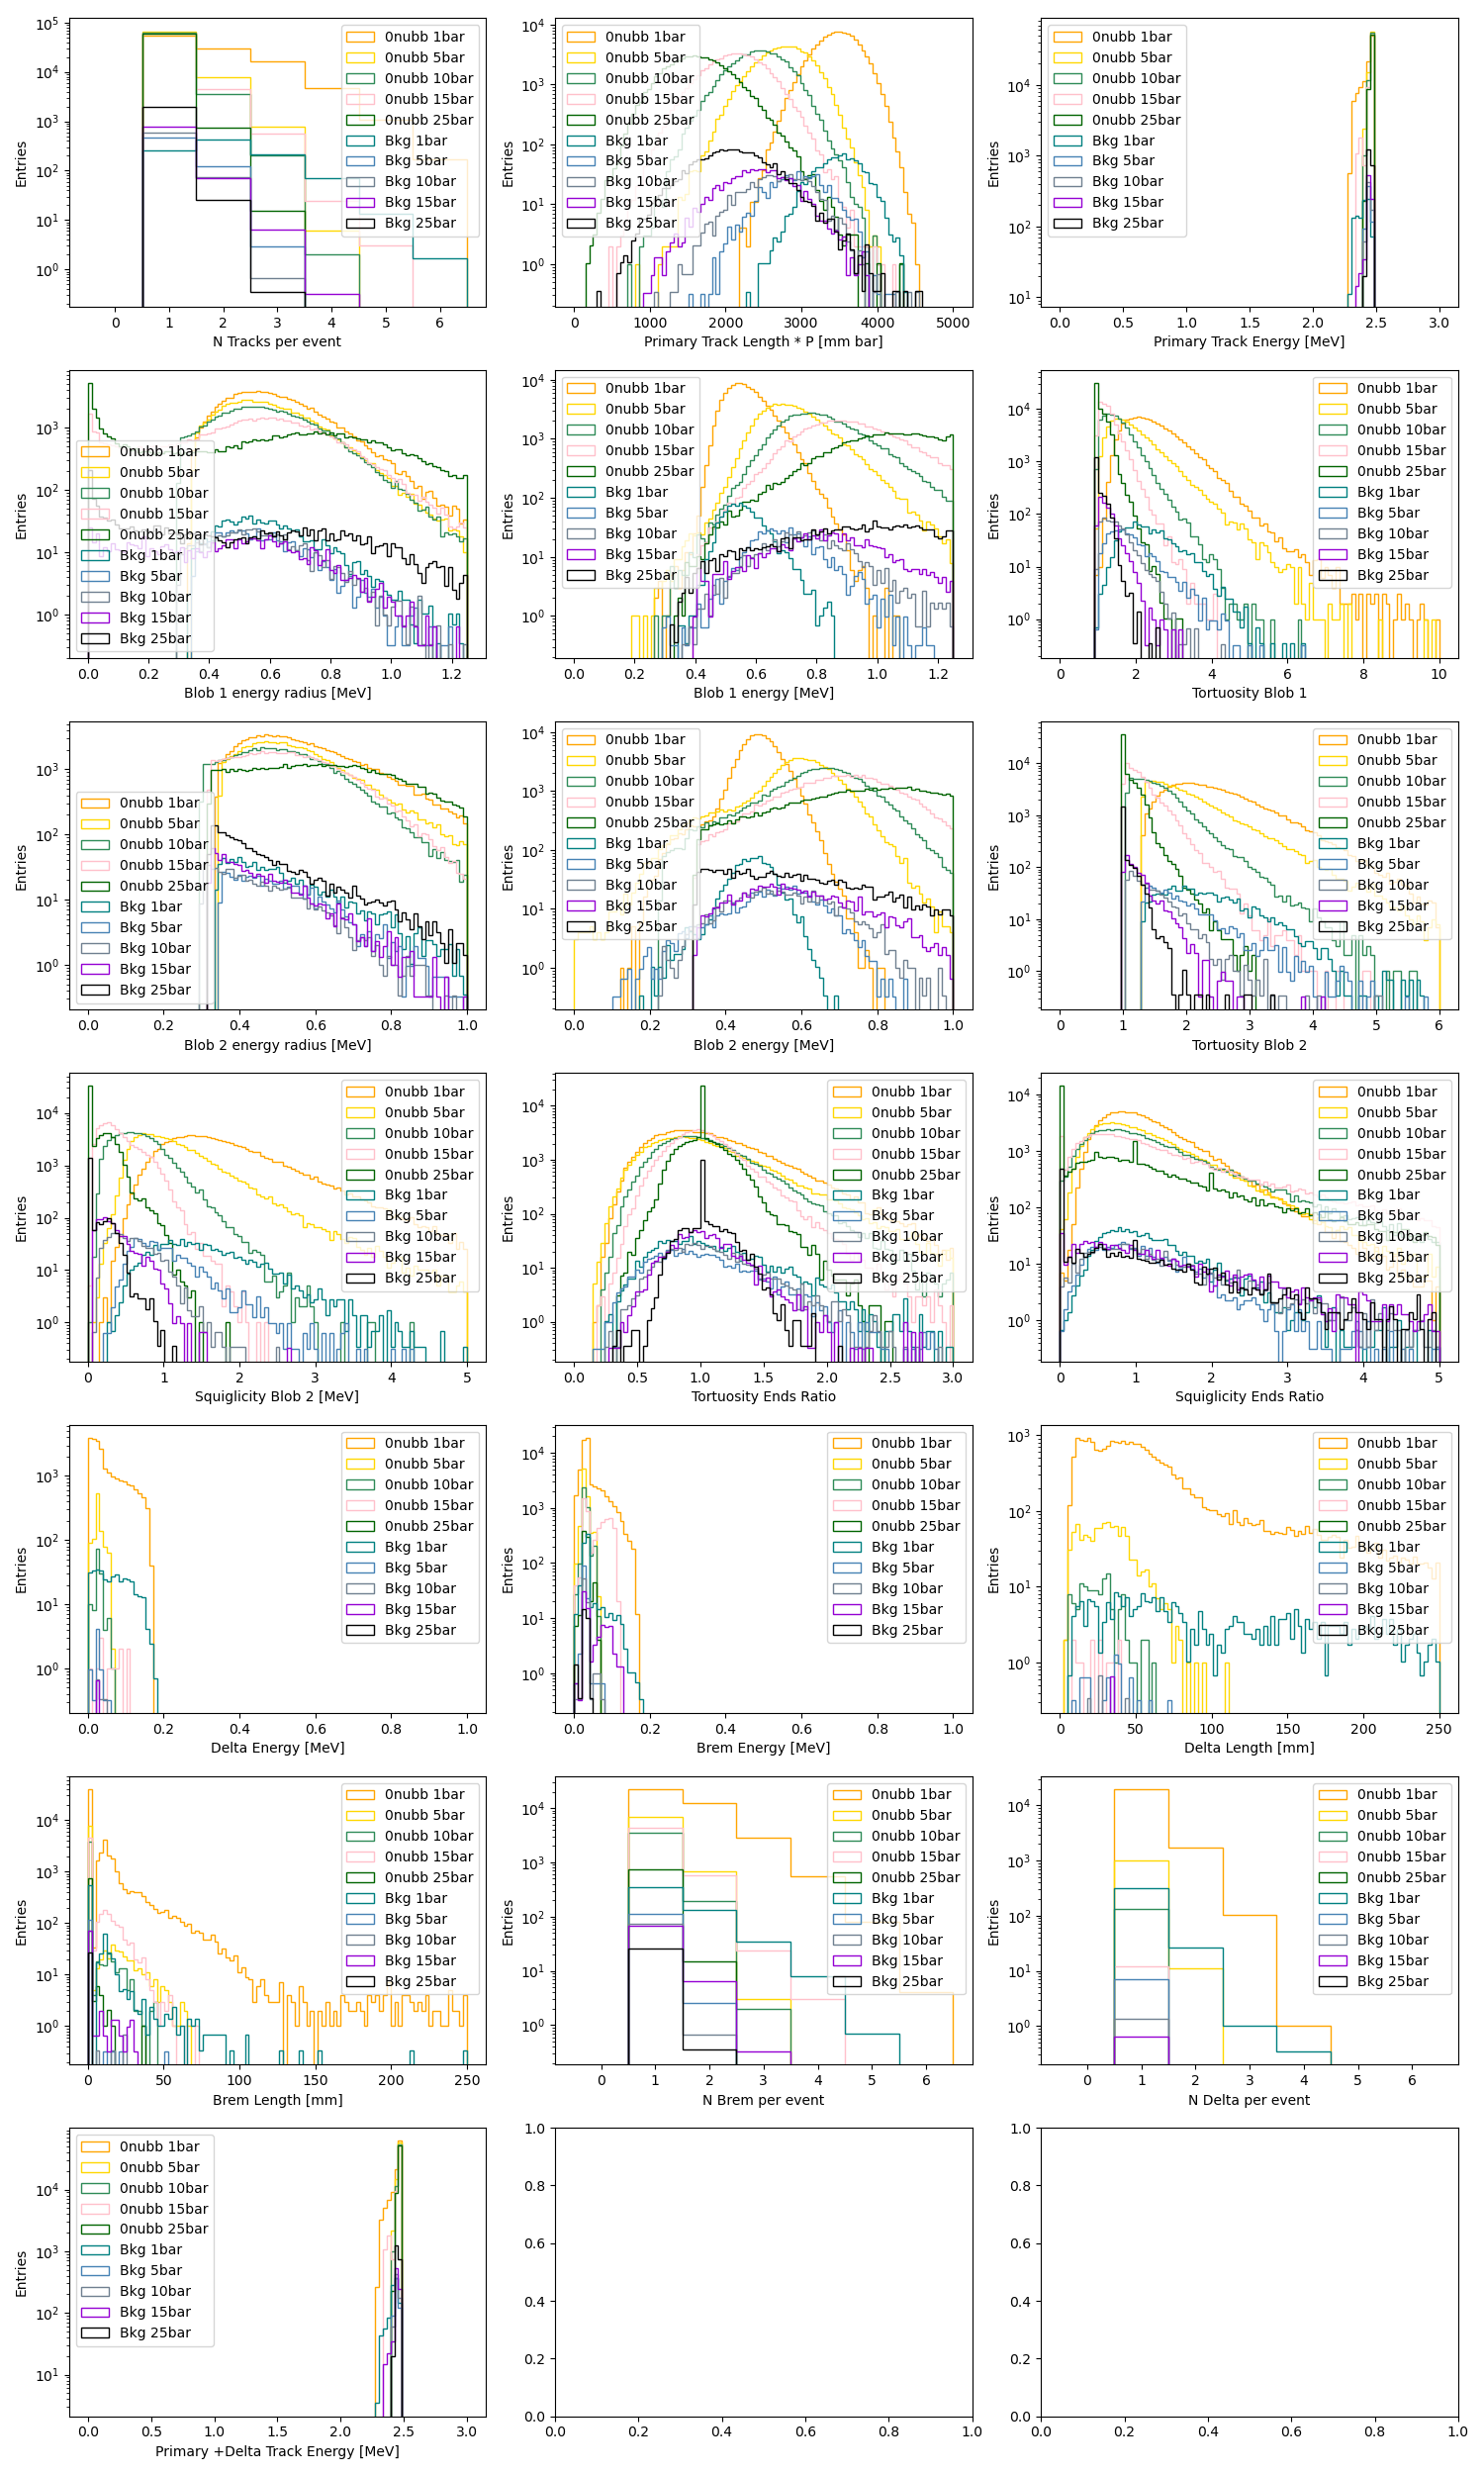

In [5]:
# Plot some variables like number of tracks
%matplotlib widget


# Function to compute count-based ratio per event_id
def compute_ratio(group):
    # Group 1: Count of Primary + Delta*
    count_group1 = group[group["label"].str.startswith(("Primary", "Delta"))].shape[0]

    # Group 2: Count of Brem* where 0.025 < energy < 0.035 (X-rays)
    count_xrays = group[(group["label"].str.startswith("Brem")) & (group["energy"].between(0.025, 0.035))].shape[0]

    # Group 3: Count of Brem* where energy ≤ 0.025 or ≥ 0.035
    count_group3 = group[(group["label"].str.startswith("Brem")) & (~group["energy"].between(0.025, 0.035))].shape[0]

    # Compute ratio
    ratio = count_xrays / (count_group1 + count_group3)
    
    return ratio

# applies cuts to the delta, brem and primary+delta energies
def ApplyGeneralCuts(df_meta, df_primary, cut_brem, cut_delta, cut_trk_e):

    brems  = GetBrems(df_meta)

    brems = brems[brems.energy > cut_brem] # these are events to cut

    df_meta = df_meta[~df_meta.event_id.isin(brems.event_id.unique())]
    df_primary = df_primary[~df_primary.event_id.isin(brems.event_id.unique())]

    deltas  = GetDeltas(df_meta)

    deltas = deltas[deltas.energy > cut_delta] # these are events to cut

    df_meta = df_meta[~df_meta.event_id.isin(deltas.event_id.unique())]
    df_primary = df_primary[~df_primary.event_id.isin(deltas.event_id.unique())]


    filtered_df = df_meta[ ~df_meta["label"].str.contains("Brem", na=False)]
    filtered_df =filtered_df[filtered_df.energy>0.01]
    trk_energies = filtered_df.groupby(["event_id"])["energy"].sum()
    trk_energies = trk_energies[trk_energies > cut_trk_e]
    unique_events_list = trk_energies.index.unique().tolist()

    df_meta = df_meta[~df_meta.event_id.isin(unique_events_list)]
    df_primary = df_primary[~df_primary.event_id.isin(unique_events_list)]

    return df_meta, df_primary

def ApplyDeltaLenCut(df_meta, df_primary, cut_delta):

    deltas  = GetDeltas(df_meta)

    deltas = deltas[deltas.length > cut_delta] # these are events to cut

    df_meta    = df_meta[~df_meta.event_id.isin(deltas.event_id.unique())]
    df_primary = df_primary[~df_primary.event_id.isin(deltas.event_id.unique())]

    return df_meta, df_primary

def GetNLongTracks(df_meta):

    # Set threshold for cumulative_distance
    threshold = 0

    # Step 1: Filter rows based on cumulative_distance
    filtered_df = df_meta[df_meta["length"] >= threshold]

    # Step 2: Count unique trkID per event_id
    trk_counts = filtered_df.groupby("event_id")["trkID"].nunique().reset_index()
    trk_counts.rename(columns={"trkID": "N_tracks"}, inplace=True)

    return trk_counts


def GetNParticles(df_meta, label):
    # Set threshold for cumulative_distance
    threshold = 0

    # Filter events with brem in the name
    filtered_df = df_meta[df_meta["label"].str.contains(label, na=False)]

    # Step 2: Count unique trkID per event_id
    trk_counts = filtered_df.groupby("event_id")["trkID"].nunique().reset_index()
    trk_counts.rename(columns={"trkID": f"N_{label}"}, inplace=True)

    return trk_counts


def GetDeltas(df_meta):
    filtered_df = df_meta[df_meta["label"].str.contains("Delta", na=False)]

    return filtered_df

def GetBrems(df_meta):
    filtered_df = df_meta[df_meta["label"].str.contains("Brem", na=False)]

    return filtered_df

# Gets the sum of the primary track and the delta energies
def GetTrackDeltaEnergy(df_meta):
    # Filter events with brem in the name
    filtered_df = df_meta[ ~df_meta["label"].str.contains("Brem", na=False)]
    filtered_df =filtered_df[filtered_df.energy>0.01]
    trk_energies = filtered_df.groupby(["event_id"])["energy"].sum()
    return trk_energies.values

# Cut out events with Brem in the name
def ApplyNTracksLenCut(df_meta, df_primary, keep_xrays):

    brems  = GetBrems(df_meta)

    if (keep_xrays):
        brems = brems[ (brems.energy < 28e-3) & (brems.energy > 30e-3) ] # these are events to cut

    df_meta    = df_meta[~df_meta.event_id.isin(brems.event_id.unique())]
    df_primary = df_primary[~df_primary.event_id.isin(brems.event_id.unique())]

    return df_meta, df_primary


# Cut out events with Brem in the name
def ApplyEventEnergyCut(df_meta, df_primary, E_res):

    event_energy = df_meta.groupby("event_id").energy.sum()

    if (E_res == 0.5):
        good_events = event_energy[(event_energy >= 2.454) & (event_energy <= 2.471)].index # 0.5%
    else:
        good_events = event_energy[(event_energy >= 2.433) & (event_energy <= 2.48)].index # 1.0%
    df_meta = df_meta[df_meta["event_id"].isin(good_events)]
    df_primary = df_primary[df_primary["event_id"].isin(good_events)]

    return df_meta, df_primary

def ApplyCuts(df_meta, df_primary, pressure, diffusion, mode, Eres):

    cuts = []

    # 1 bar
    if (pressure == 1):
       
        # 1bar no diff
        if (diffusion == "nodiff"):
            
            # All cuts
            if (mode == "all"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                # df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.175, 0.175, 2.5)
                # df_meta, df_primary = ApplyDeltaLenCut(df_meta,df_primary, 80)
                # cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.25) & (df_primary.blob1 > 0.25) & (df_primary.energy > 2.337) & (df_primary.energy < 2.5)  & (df_primary.Tortuosity2 > 1.1) & (df_primary.Tortuosity1 > 1.1)
                cuts = (df_primary.blob2R > 0.4) & (df_primary.blob1R > 0.4) & (df_primary.blob2 > 0.4) & (df_primary.Tortuosity2 > 1.7) 
            
            elif (mode == "nat"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                cuts = (df_primary.blob2R > 0.35) & (df_primary.blob1R > 0.35) & (df_primary.blob2 > 0.35) & (df_primary.Tortuosity2 > 1.7) & (df_primary.energy > 2.2)

            else:
                print("Unknown mode target specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 5%
        elif (diffusion == "5percent"):
            # All cuts
            if (mode == "all"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                # df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.115, 0.15, 2.5)
                # cuts = (df_primary.blob2R > 0.4) & (df_primary.energy > 2.4) & (df_primary.energy < 2.5) & (df_primary.Tortuosity2 >1.66)
                # cuts = (df_primary.blob2R > 0.4) & (df_primary.blob2 > 0.4) & (df_primary.blob1R > 0.3) & (df_primary.energy > 2.2) & (df_primary.Tortuosity2 >1.3) & (df_primary.Tortuosity1 >1.3)
                cuts = (df_primary.blob2R > 0.34) & (df_primary.blob1R > 0.34) &  (df_primary.energy > 2.3) & (df_primary.Tortuosity2 >1.3)

            elif (mode == "simple"):
                df_meta, df_primary = ApplyNTracksLenCut(df_meta, df_primary, keep_xrays=True)
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                cuts = (df_primary.blob2R > 0.3) 

            elif (mode == "nat"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                # cuts = (df_primary.blob2R > 0.4) & (df_primary.blob2 > 0.4) & (df_primary.blob1R > 0.3) & (df_primary.energy > 2.2) & (df_primary.Tortuosity2 >1.3) & (df_primary.Tortuosity1 >1.3)
                cuts = (df_primary.blob2R > 0.34) & (df_primary.blob1R > 0.34) &  (df_primary.energy > 2.4) & (df_primary.Tortuosity2 >1.5)

            else:
                print("Unknown efficiency target specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 0.25%
        elif (diffusion == "0.25percent"):
            # All cuts
            if (mode == "all"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                # cuts = (df_primary.blob2R > 0.35) & (df_primary.blob2 > 0.3)     & (df_primary.blob1R > 0.3) & (df_primary.energy > 2.4) & \
                #     (df_primary.energy < 2.5) & (df_primary.Tortuosity2 > 1.6) & (df_primary.Squiglicity2 > 0.5)

                cuts = (df_primary.blob2R > 0.35) & (df_primary.blob2 > 0.35) & (df_primary.blob1R > 0.3)  & (df_primary.energy > 2.39)

            elif (mode == "nat"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                cuts = (df_primary.blob2R > 0.41) & (df_primary.blob2 > 0.45) & (df_primary.blob1R > 0.4)  & (df_primary.energy > 2.4)

            else:
                print("Unknown efficiency target specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 0.1%
        elif (diffusion == "0.1percent"):
            # All cuts
            if (mode == "all"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                # df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.08, 0.1, 2.5)
                # cuts = (df_primary.blob2R > 0.4) & (df_primary.blob2 > 0.38)     & (df_primary.blob1R > 0.44) & (df_primary.energy > 2.4) & \
                #     (df_primary.energy < 2.5) & (df_primary.Tortuosity2 > 1.6) & (df_primary.Squiglicity2 > 0.5) & (df_primary.Tortuosity1 > 1.6)

                cuts = (df_primary.blob2R > 0.3) & (df_primary.blob2 > 0.3)     & (df_primary.blob1R > 0.3) & (df_primary.energy > 2.4)

            elif (mode == "nat"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                cuts = (df_primary.blob2R > 0.39) & (df_primary.blob2 > 0.39)     & (df_primary.blob1R > 0.39) & (df_primary.energy > 2.4)

        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 0.0%
        elif (diffusion == "0.0percent"):
            # All cuts
            if (mode == "all"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                # df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.13, 3, 2.5)
                cuts = (df_primary.blob2 > 0.2) & (df_primary.blob2R > 0.2) & (df_primary.blob1R > 0.2) & (df_primary.energy > 2.25)

            elif (mode == "nat"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                cuts = (df_primary.blob2 > 0.27) & (df_primary.blob2R > 0.27) & (df_primary.blob1R > 0.27) & (df_primary.energy > 2.4)

            else:
                print("Unknown efficiency target specified")

        else:
            print("Unknown diffusion specified")
    # -------------------------------------------------------------------------------------------------------------------------------------
    # 5bar
    elif (pressure == 5):
    
        # 5 bar no diff
        if (diffusion == "nodiff"):
            
            # All cuts
            if (mode == "all"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.17, 0.17, 2.5)
                cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.35) & (df_primary.blob1 > 0.35) & (df_primary.energy > 2.3) & (df_primary.energy < 2.5)  & (df_primary.Tortuosity2 > 1.35) & (df_primary.Tortuosity1 > 1.65)
            
            else:
                print("Unknown efficiency target specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 5bar 5%
        elif (diffusion == "5percent"):
            
            # All cuts
            if (mode == "all"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                # df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.17, 0.17, 2.5)
                # cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.35) & (df_primary.blob1R > 0.35) & (df_primary.energy > 2.4) & (df_primary.energy < 2.5) & (df_primary.Tortuosity2 > 1.63)
                cuts = (df_primary.blob2R > 0.35) & (df_primary.blob1R > 0.35) & (df_primary.energy > 2.4) & (df_primary.Tortuosity2 > 1.3)
            
            elif (mode == "simple"):
                df_meta, df_primary = ApplyNTracksLenCut(df_meta, df_primary, keep_xrays=False)
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                cuts = (df_primary.blob2R > 0.3) & (df_primary.blob2 > 0.4) 

            elif (mode == "nat"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                # df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.17, 0.17, 2.5)
                # cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.35) & (df_primary.blob1R > 0.35) & (df_primary.energy > 2.4) & (df_primary.energy < 2.5) & (df_primary.Tortuosity2 > 1.63)
                cuts = (df_primary.blob2R > 0.37) &  (df_primary.blob2 > 0.4) & (df_primary.blob1R > 0.37) & (df_primary.energy > 2.4) & (df_primary.Tortuosity2 > 1.3) & (df_primary.Tortuosity1 > 1.1)

            else:
                print("Unknown efficiency target specified")

        else:
            print("Unknown diffusion specified")

    # -------------------------------------------------------------------------------------------------------------------------------------
    # 10bar
    elif (pressure == 10):

        # 10bar no diff
        if (diffusion == "nodiff"):
            # All cuts
            if (mode == "all"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.17, 0.17, 2.5)
                cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.25) & (df_primary.blob1 > 0.25) & (df_primary.energy > 2.1) & (df_primary.energy < 2.5)  & (df_primary.Tortuosity2 > 1.27) & (df_primary.Tortuosity1 > 1.25)
            
            else:
                print("Unknown diffusion specified")

        # -------------------------------------------------------------------------------------------------------------------------------------
        # 10bar 5%
        elif (diffusion == "5percent"):
            
            # All cuts
            if (mode == "all"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                # df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.17, 0.17, 2.5)
                # cuts = (df_primary.blob2R > 0.23) & (df_primary.blob2 > 0.23) & (df_primary.blob1 > 0.23) & (df_primary.energy > 2.4) & (df_primary.energy < 2.5)  & (df_primary.Tortuosity2 > 1.34)
                cuts = (df_primary.blob2R > 0.3) & (df_primary.blob2 > 0.23) & (df_primary.blob1R > 0.3) & (df_primary.energy > 2.4) & (df_primary.Tortuosity2 > 1.06)

            elif (mode == "simple"):
                df_meta, df_primary = ApplyNTracksLenCut(df_meta, df_primary, keep_xrays=False)
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                cuts = (df_primary.blob2R > 0.3) & (df_primary.blob2 > 0.4) 

            elif (mode == "nat"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                # df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.17, 0.17, 2.5)
                # cuts = (df_primary.blob2R > 0.23) & (df_primary.blob2 > 0.23) & (df_primary.blob1 > 0.23) & (df_primary.energy > 2.4) & (df_primary.energy < 2.5)  & (df_primary.Tortuosity2 > 1.34)
                cuts = (df_primary.blob2R > 0.32) & (df_primary.blob2 > 0.42) & (df_primary.blob1R > 0.3) & (df_primary.energy > 2.4) & (df_primary.Tortuosity2 > 1.06)

            else:
                print("Unknown efficiency target specified")

        else:
            print("Unknown diffusion specified")

    # -------------------------------------------------------------------------------------------------------------------------------------
    # 15bar
    elif (pressure == 15):
        
        # 15bar no diff
        if (diffusion == "nodiff"):
        
            # All cuts
            if (mode == "all"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.175, 3, 2.5)
                cuts = (df_primary.blob2R > 0.4) & (df_primary.blob2 > 0.32) & (df_primary.blob1 > 0.4) & (df_primary.energy > 2.35) & (df_primary.energy < 2.5) & (df_primary.Tortuosity2 > 1.15)
            
            else:
                print("Unknown efficiency target specified")

        # -------------------------------------------------------------------------------------------------------------------------------------
        # 15bar 5%
        elif (diffusion == "5percent"):
            
            # All cuts
            if (mode == "all"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.175, 3, 2.5)
                cuts = (df_primary.blob2R > 0.32) & (df_primary.blob2 > 0.32) & (df_primary.blob1 > 0.4) & (df_primary.energy > 2.35) & (df_primary.Tortuosity2 > 1.01)


            elif (mode == "simple"):
                df_meta, df_primary = ApplyNTracksLenCut(df_meta, df_primary, keep_xrays=False)
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.35) 

            elif (mode == "nat"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.175, 3, 2.5)
                cuts = (df_primary.blob2R > 0.32) & (df_primary.blob2 > 0.47) & (df_primary.blob1 > 0.4) & (df_primary.energy > 2.35) & (df_primary.Tortuosity2 > 1.01)
            
        else:
            print("Unknown diffusion specified")

    # -------------------------------------------------------------------------------------------------------------------------------------
    # 25bar
    elif (pressure == 25):

        # -------------------------------------------------------------------------------------------------------------------------------------
        # 25bar 5%
        if (diffusion == "5percent"):
            
            # All cuts
            if (mode == "all"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.1, 3, 2.5)
                cuts = (df_primary.blob2R > 0.32) & (df_primary.blob2 > 0.32) & (df_primary.blob1 > 0.3) & (df_primary.energy > 2.4) 
        
            elif (mode == "simple"):
                df_meta, df_primary = ApplyNTracksLenCut(df_meta, df_primary, keep_xrays=False)
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.35) 

            elif (mode == "nat"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.1, 3, 2.5)
                cuts = (df_primary.blob2R > 0.36) & (df_primary.blob2 > 0.33) & (df_primary.blob1 > 0.5) & (df_primary.energy > 2.4) 

        else:
            print("Unknown diffusion specified")

    else:
        print("Unknown pressure specified")

    return df_meta, df_primary, cuts


def PlotDistributionswithCuts(df_meta, col, label, pressure, diffusion, mode, scale_factor):

    print("Running cuts with")
    print("Pressure:",  pressure,"bar")
    print("Diffusion:", diffusion )
    print("Cut mode is :", mode)

    uselog=True

    df_primary = df_meta[ (df_meta.label == "Primary") & (df_meta.primary == 1)]

    # Apply the cuts
    df_meta, df_primary, cuts = ApplyCuts(df_meta, df_primary, pressure, diffusion, mode, 1.0)
    

    df_primary = df_primary[ cuts ]

    df_meta = df_meta[(df_meta.event_id.isin(df_primary.event_id.unique()))]

    df_counts      = GetNLongTracks(df_meta)
    df_counts_evts = df_counts[df_counts.N_tracks >= 1].event_id.unique()

    # Number of brems and deltas
    N_brem  = GetNParticles(df_meta, "Brem")
    N_delta = GetNParticles(df_meta, "Delta")

    # Dataframes containing brems and deltas
    deltas = GetDeltas(df_meta)
    brems  = GetBrems(df_meta)

    # This is the sum of the primary and delta energies attached to it
    trk_e = GetTrackDeltaEnergy(df_meta)

    # Calculate the ratio of x-rays to tracks
    # x_ray_ratio = df_meta.groupby("event_id").apply(compute_ratio).reset_index(name="ratio")


    weights        = np.ones_like(df_primary.energy)  * scale_factor
    weights_counts = np.ones_like(df_counts.N_tracks) * scale_factor
    weights_deltas = np.ones_like(deltas.energy)      * scale_factor
    weights_brem   = np.ones_like(brems.energy)       * scale_factor
    weights_Ndelta = np.ones_like(N_delta.N_Delta)    * scale_factor
    weights_Nbrem  = np.ones_like(N_brem.N_Brem)      * scale_factor
    weights_trke   = np.ones_like(trk_e)              * scale_factor

    bin_edges = np.arange(-0.5, 7.5, 1)
    bin_centers = np.arange(0, 7, 1)

    # Multiplicities
    axs[0,0].hist(df_counts.N_tracks, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_counts);
    # axs[0,0].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label);
    axs[0,0].set_xlabel("N Tracks per event")
    axs[0,0].set_ylabel("Entries")
    axs[0,0].set_xticks(bin_centers) ;
    axs[0,0].legend()
    if (uselog): axs[0,0].semilogy()

    scale = 0
    if pressure == 1:
        scale = 0
    elif pressure == 5:
        scale = 0
    elif pressure == 10:
        scale = 0
    elif pressure == 15:
        scale = 0

    
    axs[0,1].hist(df_primary.length*pressure+scale, bins = np.linspace(0, 5000, 100), histtype="step", color = col, label = label, weights = weights);
    axs[0,1].set_xlabel("Primary Track Length * P [mm bar]")
    axs[0,1].set_ylabel("Entries")
    axs[0,1].legend()
    if (uselog): axs[0,1].semilogy()

    axs[0,2].hist(df_primary.energy, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights);
    axs[0,2].set_xlabel("Primary Track Energy [MeV]")
    axs[0,2].set_ylabel("Entries")
    axs[0,2].legend()
    if (uselog): axs[0,2].semilogy()

    axs[1,1].hist(df_primary.blob1, bins = np.linspace(0, 1.25, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,1].set_xlabel("Blob 1 energy [MeV]")
    axs[1,1].set_ylabel("Entries")
    axs[1,1].legend()
    if (uselog): axs[1,1].semilogy()

    axs[2,1].hist(df_primary.blob2, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,1].set_xlabel("Blob 2 energy [MeV]")
    axs[2,1].set_ylabel("Entries")
    axs[2,1].legend()
    if (uselog): axs[2,1].semilogy()

    axs[1,0].hist(df_primary.blob1R, bins = np.linspace(0, 1.25, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,0].set_xlabel("Blob 1 energy radius [MeV]")
    axs[1,0].set_ylabel("Entries")
    axs[1,0].legend()
    if (uselog): axs[1,0].semilogy()

    axs[2,0].hist(df_primary.blob2R, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,0].set_xlabel("Blob 2 energy radius [MeV]")
    axs[2,0].set_ylabel("Entries")
    axs[2,0].legend()
    if (uselog): axs[2,0].semilogy()

    axs[1,2].hist(df_primary.Tortuosity1, bins = np.linspace(0, 10, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,2].set_xlabel("Tortuosity Blob 1")
    axs[1,2].set_ylabel("Entries")
    axs[1,2].legend()
    if (uselog): axs[1,2].semilogy()

    axs[2,2].hist(df_primary.Tortuosity2, bins = np.linspace(0, 6, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,2].set_xlabel("Tortuosity Blob 2")
    axs[2,2].set_ylabel("Entries")
    axs[2,2].legend()
    if (uselog): axs[2,2].semilogy()

    axs[3,0].hist(df_primary.Squiglicity2, bins = np.linspace(0, 5, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,0].set_xlabel("Squiglicity Blob 2 [MeV]")
    axs[3,0].set_ylabel("Entries")
    axs[3,0].legend()
    if (uselog): axs[3,0].semilogy()

    axs[3,1].hist(df_primary.Tortuosity1/df_primary.Tortuosity2, bins = np.linspace(0, 3, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,1].set_xlabel("Tortuosity Ends Ratio")
    axs[3,1].set_ylabel("Entries")
    axs[3,1].legend()
    if (uselog): axs[3,1].semilogy()

    axs[3,2].hist(df_primary.Squiglicity1/df_primary.Squiglicity2, bins = np.linspace(0, 5, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,2].set_xlabel("Squiglicity Ends Ratio")
    axs[3,2].set_ylabel("Entries")
    axs[3,2].legend()
    if (uselog): axs[3,2].semilogy()

    axs[4,0].hist(deltas.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label, weights = weights_deltas);
    axs[4,0].set_xlabel("Delta Energy [MeV]")
    axs[4,0].set_ylabel("Entries")
    axs[4,0].legend()
    if (uselog): axs[4,0].semilogy()

    axs[4,1].hist(brems.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label, weights = weights_brem);
    axs[4,1].set_xlabel("Brem Energy [MeV]")
    axs[4,1].set_ylabel("Entries")
    axs[4,1].legend()
    if (uselog): axs[4,1].semilogy()

    axs[4,2].hist(deltas.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label, weights = weights_deltas);
    axs[4,2].set_xlabel("Delta Length [mm]")
    axs[4,2].set_ylabel("Entries")
    axs[4,2].legend()
    if (uselog): axs[4,2].semilogy()

    axs[5,0].hist(brems.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label, weights = weights_brem);
    axs[5,0].set_xlabel("Brem Length [mm]")
    axs[5,0].set_ylabel("Entries")
    axs[5,0].semilogy()
    axs[5,0].legend()
    if (uselog): axs[5,0].semilogy()

    axs[5,1].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_Nbrem);
    axs[5,1].set_xlabel("N Brem per event")
    axs[5,1].set_ylabel("Entries")
    axs[5,1].set_xticks(bin_centers) ;
    axs[5,1].legend()
    if (uselog): axs[5,1].semilogy()

    axs[5,2].hist(N_delta.N_Delta, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_Ndelta);
    axs[5,2].set_xlabel("N Delta per event")
    axs[5,2].set_ylabel("Entries")
    axs[5,2].set_xticks(bin_centers) ;
    axs[5,2].legend()
    if (uselog): axs[5,2].semilogy()

    axs[6,0].hist(trk_e, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights_trke);
    axs[6,0].set_xlabel("Primary +Delta Track Energy [MeV]")
    axs[6,0].set_ylabel("Entries")
    axs[6,0].legend()
    if (uselog): axs[6,0].semilogy()


    bin_edges = np.arange(-0.5, 3.5, 0.5)
    bin_centers = np.arange(0, 3, 0.5)

    # Multiplicities
    # axs[6,1].hist(x_ray_ratio.ratio, bins = bin_edges, histtype="step", color = col, label = label);
    # axs[6,1].set_xlabel("N x-rays per track")
    # axs[6,1].set_ylabel("Entries")
    # axs[6,1].set_xticks(bin_centers) ;
    # axs[6,1].legend()
    # if (uselog): axs[6,1].semilogy()



    plt.tight_layout()

    return len(df_primary.event_id.unique())

fig, axs = plt.subplots(7, 3, figsize=(15, 25))
num_nubb_1bar_cut  = PlotDistributionswithCuts(nubb_meta_1bar,  "orange",   "0nubb 1bar",  1,  diff, "all",  sf_nubb_1bar)
num_nubb_5bar_cut  = PlotDistributionswithCuts(nubb_meta_5bar,  "gold",     "0nubb 5bar",  5,  diff, "all",  sf_nubb_5bar)
num_nubb_10bar_cut = PlotDistributionswithCuts(nubb_meta_10bar, "seagreen", "0nubb 10bar", 10, diff, "all",  sf_nubb_10bar)
num_nubb_15bar_cut = PlotDistributionswithCuts(nubb_meta_15bar, "Pink",     "0nubb 15bar", 15, diff, "all",  sf_nubb_15bar)
num_nubb_15bar_cut = PlotDistributionswithCuts(nubb_meta_25bar, "darkgreen","0nubb 25bar", 25, diff, "all",  sf_nubb_25bar)

num_Bkg_1bar_cut  = PlotDistributionswithCuts(Bkg_meta_1bar,  "Teal",       "Bkg 1bar",  1,  diff, "all", sf_Bkg_1bar)
num_Bkg_5bar_cut  = PlotDistributionswithCuts(Bkg_meta_5bar,  "steelblue",  "Bkg 5bar",  5,  diff, "all", sf_Bkg_5bar)
num_Bkg_10bar_cut = PlotDistributionswithCuts(Bkg_meta_10bar, "slategray",  "Bkg 10bar", 10, diff, "all", sf_Bkg_10bar)
num_Bkg_15bar_cut = PlotDistributionswithCuts(Bkg_meta_15bar, "darkviolet", "Bkg 15bar", 15, diff, "all", sf_Bkg_15bar)
num_Bkg_15bar_cut = PlotDistributionswithCuts(Bkg_meta_25bar, "k",          "Bkg 25bar", 25, diff, "all", sf_Bkg_25bar)


In [6]:
def ApplyCutsnoPlot(df_meta, pressure, diffusion, mode, E_res):
    
    df_primary = df_meta[ (df_meta.label == "Primary") & (df_meta.primary == 1)]

    # Apply the cuts
    df_meta, df_primary, cuts = ApplyCuts(df_meta, df_primary, pressure, diffusion, mode, E_res)
    df_primary = df_primary[ cuts ]

    return len(df_primary.event_id.unique())

def ApplyContainmentCorr(eff, p, mass):

    if (p == 1):
        if mass == 1:
            factor = 0.51
        else:
            factor = 0.69
        print("Correcting Efficiency by factor ", factor)
        return eff*factor
    elif (p == 5):
        if mass == 1:
            factor = 0.74
        else:
            factor = 0.84
        print("Correcting Efficiency by factor ", factor)
        return eff*factor
    elif (p == 10):
        if mass == 1:
            factor = 0.82
        else:
            factor = 0.89
        print("Correcting Efficiency by factor ", factor)
        return eff*factor
    elif (p == 15):
        if mass == 1:
            factor = 0.84
        else:
            factor = 0.91
        print("Correcting Efficiency by factor ", factor)
        return eff*factor
    elif (p == 25):
        if mass == 1:
            factor = 0.88
        else:
            factor = 0.94
        print("Correcting Efficiency by factor ", factor)
        return eff*factor
    else:
        return eff


def FOM(eff, bkg_eff):
    return eff/np.sqrt(bkg_eff)

def CalcEfficiency(n, N, label, pressure, mass):
    efficiency = n/N

    if (label == "Bkg"):
        error=np.sqrt( (efficiency/N) * (1-efficiency)  )
        print(f"Bkg eff: {label}:", round(100*efficiency, 3), "+/-", round(100*error,3),  "%", "     (bkg rej ==", round(100-100*efficiency,3), "%)")
    else:
        efficiency = ApplyContainmentCorr(efficiency, pressure, mass)
        error=np.sqrt( (efficiency/N) * (1-efficiency)  )
        print(f"Efficiency {label}:",  round(100*efficiency, 3), " +/-", round(100*error,3),  "%")

    return efficiency, error

On Pressure 1
Correcting Efficiency by factor  0.69
Efficiency nubb: 30.122  +/- 0.108 %
Bkg eff: Bkg: 0.272 +/- 0.007 %      (bkg rej == 99.728 %)
On Pressure 5
Correcting Efficiency by factor  0.84
Efficiency nubb: 30.497  +/- 0.109 %
Bkg eff: Bkg: 0.241 +/- 0.007 %      (bkg rej == 99.759 %)
On Pressure 10
Correcting Efficiency by factor  0.89
Efficiency nubb: 30.265  +/- 0.108 %
Bkg eff: Bkg: 0.283 +/- 0.007 %      (bkg rej == 99.717 %)
On Pressure 15
Correcting Efficiency by factor  0.91
Efficiency nubb: 30.458  +/- 0.109 %
Bkg eff: Bkg: 0.366 +/- 0.008 %      (bkg rej == 99.634 %)
On Pressure 25
Correcting Efficiency by factor  0.94
Efficiency nubb: 29.999  +/- 0.109 %
Bkg eff: Bkg: 0.805 +/- 0.013 %      (bkg rej == 99.195 %)
On Pressure 1
Correcting Efficiency by factor  0.69
Efficiency nubb: 30.122  +/- 0.108 %
Bkg eff: Bkg: 0.554 +/- 0.017 %      (bkg rej == 99.446 %)
On Pressure 5
Correcting Efficiency by factor  0.84
Efficiency nubb: 30.497  +/- 0.109 %
Bkg eff: Bkg: 0.419 

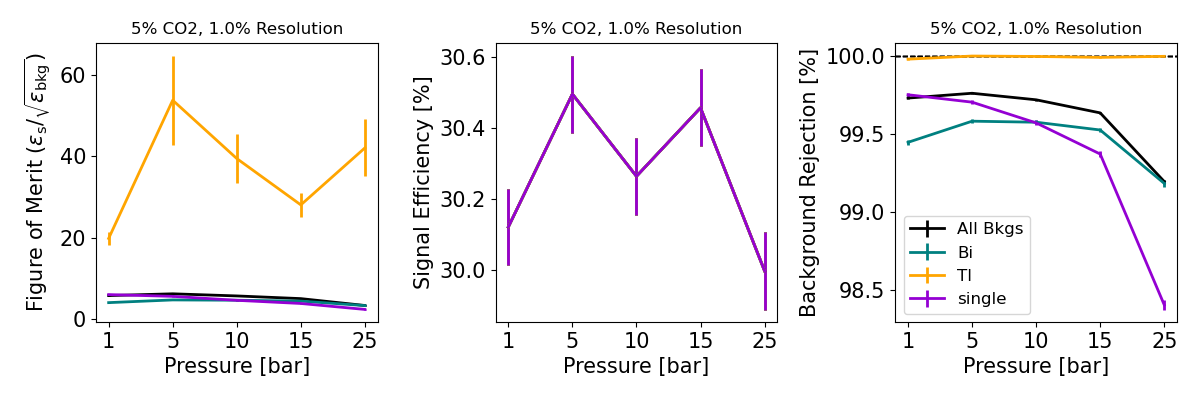

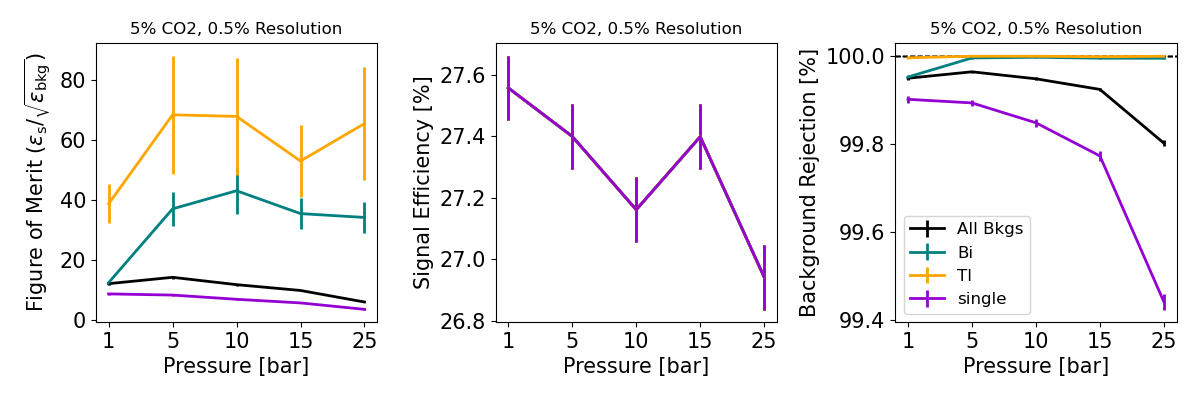

In [57]:
nubb_meta   = [nubb_meta_1bar,    nubb_meta_5bar,    nubb_meta_10bar,    nubb_meta_15bar,   nubb_meta_25bar]
Bkg_meta    = [Bkg_meta_1bar,     Bkg_meta_5bar,     Bkg_meta_10bar,     Bkg_meta_15bar,    Bkg_meta_25bar]
Bi_meta     = [Bi_meta_1bar,      Bi_meta_5bar,      Bi_meta_10bar,      Bi_meta_15bar,     Bi_meta_25bar]
Tl_meta     = [Tl_meta_1bar,      Tl_meta_5bar,      Tl_meta_10bar,      Tl_meta_15bar,     Tl_meta_25bar]
single_meta = [single_meta_1bar,  single_meta_5bar,  single_meta_10bar,  single_meta_15bar, single_meta_25bar]

num_nubb    = [num_nubb_1bar,   num_nubb_5bar,   num_nubb_10bar,   num_nubb_15bar,   num_nubb_25bar]
num_Bkg     = [num_Bkg_1bar,    num_Bkg_5bar,    num_Bkg_10bar,    num_Bkg_15bar,    num_Bkg_25bar]
num_Bi      = [num_Bi_1bar,     num_Bi_5bar,     num_Bi_10bar,     num_Bi_15bar,     num_Bi_25bar]
num_Tl      = [num_Tl_1bar,     num_Tl_5bar,     num_Tl_10bar,     num_Tl_15bar,     num_Tl_25bar]
num_single  = [num_single_1bar, num_single_5bar, num_single_10bar, num_single_15bar, num_single_25bar]

cols = ["k", "Teal", "Orange", "darkviolet", "Pink"]
pressures_label = ["1", "5", "10", "15", "25"]
pressures = [1, 5, 10, 15, 25]

def Calc_FOM_err(fom, eff, eff_err, bkg, bkg_err):
    return fom*np.sqrt( (eff_err/eff)**2 + 0.25*(bkg_err/bkg)**2)

# mode = "enr"
mode = "nat"

if mode == "enr":
    mass = 1
    selection = "all"
    mode_label = "enriched"
else:
    mass = 10
    selection = "nat"
    mode_label = "natural"


def PlotPerformance(nubb_meta, num_nubb, Bkg_meta, num_Bkg, E_res, diff, col_index, labels):

    fom = []
    fom_err = []
    eff = []
    eff_err = []
    Bkg_eff = []
    Bkg_err = []

    # Loop over pressures
    for index in range(len(nubb_meta)):
        print("On Pressure", pressures_label[index])
        nubb_cut = ApplyCutsnoPlot(nubb_meta[index], pressures[index], diff, selection, E_res)
        Bkg_cut  = ApplyCutsnoPlot(Bkg_meta[index],  pressures[index], diff, selection, E_res)
        
        nubb_eff, nubb_err =  CalcEfficiency(nubb_cut, num_nubb[index], "nubb", pressures[index], mass)
        eff.append(100*nubb_eff)
        eff_err.append(100*nubb_err)
        
        Bkg_eff_, Bkg_err_ =  CalcEfficiency(Bkg_cut, num_Bkg[index], "Bkg", pressures[index], mass)
        Bkg_eff.append(100-100*Bkg_eff_)
        Bkg_err.append(100*Bkg_err_)

        fom.append(FOM(nubb_eff,  Bkg_eff_))
        fom_err.append(Calc_FOM_err(fom[index], nubb_eff, nubb_err, Bkg_eff_, Bkg_err_))

    axs[0].errorbar(pressures_label, fom, fom_err, color=cols[col_index], linewidth = 2, label =f"{labels[col_index]}")
    axs[0].set_xlabel("Pressure [bar]")
    axs[0].set_ylabel(r"Figure of Merit ($\epsilon_{\mathrm{s}}/\sqrt{\epsilon_{\mathrm{bkg}}}$)")

    axs[1].errorbar(pressures_label, eff, eff_err, color=cols[col_index], linewidth = 2, label =f"{labels[col_index]}")
    axs[1].set_xlabel("Pressure [bar]")
    axs[1].set_ylabel("Signal Efficiency [%]")

    axs[2].errorbar(pressures_label, Bkg_eff, Bkg_err, color=cols[col_index], linewidth = 2, label =f"{labels[col_index]}")
    axs[2].set_xlabel("Pressure [bar]")
    axs[2].set_ylabel("Background Rejection [%]")


    # axs[0].legend(fontsize=12)
    # axs[1].legend(fontsize=12)
    axs[2].legend(fontsize=12)
    axs[2].axhline(y=100, color='k', linestyle='--', linewidth=1)

    if (diff == "nodiff"):
        axs[0].set_title(f"No Diffusion {E_res}% Resolution", fontsize=12)
        axs[1].set_title(f"No Diffusion {E_res}% Resolution", fontsize=12)
        axs[2].set_title(f"No Diffusion {E_res}% Resolution", fontsize=12)
    else:
        axs[0].set_title(f"5% CO2, {E_res}% Resolution", fontsize=12)
        axs[1].set_title(f"5% CO2, {E_res}% Resolution", fontsize=12)
        axs[2].set_title(f"5% CO2, {E_res}% Resolution", fontsize=12)

    plt.tight_layout()

    return eff, 1 - np.array(Bkg_eff)/100, fom

labels=["All Bkgs", "Bi", "Tl", "single"]

for E_res in [1.0, 0.5]:

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    eff, bkg_perf_all, fom_all       = np.array(PlotPerformance(nubb_meta, num_nubb, Bkg_meta, num_Bkg, E_res, diff, 0, labels))
    eff, bkg_perf_Bi, fom_Bi         = np.array(PlotPerformance(nubb_meta, num_nubb, Bi_meta, num_Bi, E_res, diff, 1, labels))
    eff, bkg_perf_Tl, fom_Tl         = np.array(PlotPerformance(nubb_meta, num_nubb, Tl_meta, num_Tl, E_res, diff, 2, labels))
    eff, bkg_perf_single, fom_single = np.array(PlotPerformance(nubb_meta, num_nubb, single_meta, num_single, E_res, diff, 3, labels))


    # Print a latex table
    print(r"\begin{table}[h!]")
    print(r"\centering")
    print(r"\resizebox{\columnwidth}{!}{%")
    print(r"\begin{tabular}{|c|c||T|T||O|O||V|V||c|c|}")
    print(r"\hline")
    print(r"\textbf{Pressure [bar]} & \textbf{Sig. Eff [\%]} & \textbf{Bkg. Eff Bi [\%]} & \textbf{F.O.M. Bi} & \textbf{Bkg. Eff Tl [\%]} & \textbf{F.O.M. Tl} & \textbf{Bkg. Eff Single [\%]} & \textbf{F.O.M. Single} & \textbf{Bkg. Eff Tot [\%]} & \textbf{F.O.M. Tot} \\")
    print(r"\hline")
    for p, e, Bi, fBi, Tl, fTl, Sin, fSin, b, f in zip(pressures_label, eff, bkg_perf_Bi, fom_Bi, bkg_perf_Tl, fom_Tl, bkg_perf_single, fom_single, bkg_perf_all, fom_all):
        print(f"{p} & {e:.1f} & {Bi:.5f} & {fBi:.1f} & {Tl:.5f} & {fTl:.1f} & {Sin:.5f} & {fSin:.1f} & {b:.5f} & {f:.1f} \\\\")
    print(r"\hline")
    print(r"\end{tabular}")
    print(r"}")
    print(f"\\caption{{Performance table for an energy resolution cut of {E_res}\% and {mode_label} xenon detector.}}")
    print(f"\\label{{tab:performance_{mode}_{E_res}}}")
    print(r"\end{table}")


    if (E_res == 1.0):
        plt.savefig(f"../../../Projects/Atmospheric TPC/Technical Note/Images/Performance_1percent_pressure_{mode}.pdf")
        bkg_perf_all_1    = bkg_perf_all
        bkg_perf_Bi_1     = bkg_perf_Bi
        bkg_perf_Tl_1     = bkg_perf_Tl
        bkg_perf_single_1 = bkg_perf_single
    else:
        plt.savefig(f"../../../Projects/Atmospheric TPC/Technical Note/Images/Performance_0.5percent_pressure_{mode}.pdf")

In [19]:
print(100* (1-bkg_perf_Bi))
print(1/bkg_perf_all)

[99.95120761 99.99452082 99.99601871 99.99402271 99.99378109]
[1942.57407407 2706.08695652 1892.01413428 1299.67058824  502.63627354]


Mode is natural!

Post
Pressure:  1  Acceptance: 8.11888265430544e-09 Activity [muBq] 0.0008152779783868562 Rate 0.022090563785327658
Pressure:  5  Acceptance: 6.0061528691010744e-09 Activity [muBq] 0.000208118757567127 Rate 0.005643094271546243
Pressure:  10  Acceptance: 9.014422215566165e-09 Activity [muBq] 0.0001978907726724415 Rate 0.005367507880848755
Pressure:  15  Acceptance: 1.935267184699975e-08 Activity [muBq] 0.0003255404720295136 Rate 0.008830348774640511
Pressure:  25  Acceptance: 2.9613460820874902e-08 Activity [muBq] 0.0003567752078843647 Rate 0.009666681936875268

Post
Pressure:  1  Acceptance: 1.830579988443258e-08 Activity [muBq] 0.001752056143448798 Rate 0.047473265583491006
Pressure:  5  Acceptance: 2.767936479873174e-08 Activity [muBq] 0.000914157072027058 Rate 0.02478716765731935
Pressure:  10  Acceptance: 4.715889262216071e-08 Activity [muBq] 0.0009867363064998364 Rate 0.026763829510253027
Pressure:  15  Acceptance: 1.066476142344913e-07 Activity [muBq] 0.0017098

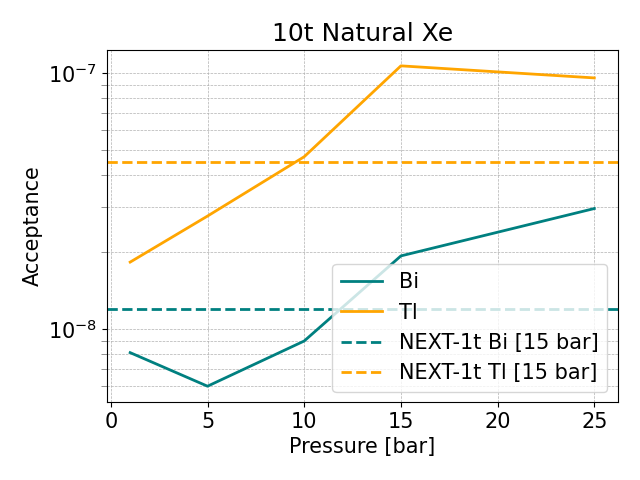

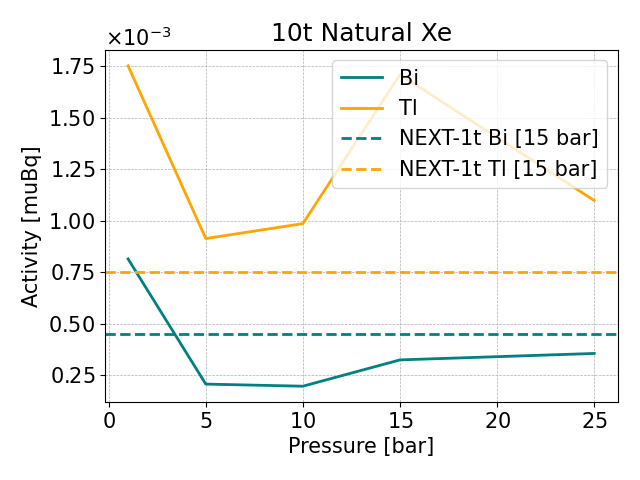

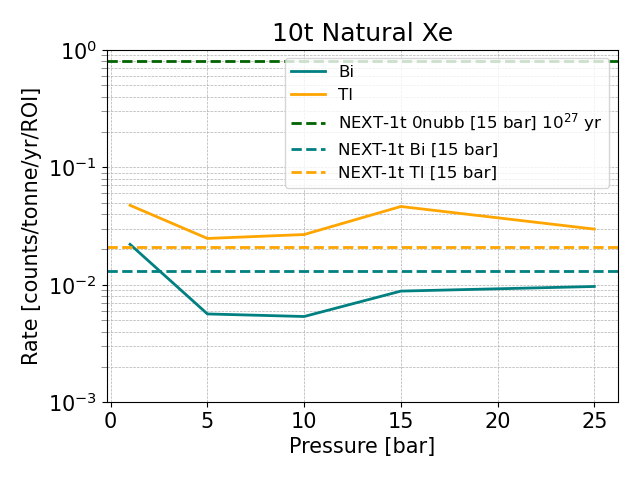

In [9]:
# Make a plot of the expected rate accounting for natural radioactivity
plt.rcParams.update({'font.size': 15})
def CalcAcceptance(p, det_size, N, IntWindow, Rej, BR, A_Cu, mode, enrichment, mass):
    # A_Cu = Activity of Cu muBq/kg
    rho_Cu = 8960 # kg/m^3
    rho_Xe = 5.987 # kg/m3
    M_Xe = mass * enrichment * rho_Xe * p * det_size**3/1e3 # tonne

    Acceptance = (Rej * N) / ( (1e6/BR) * (N/IntWindow)) 
    # Acceptance = (Rej * BR * IntWindow) / 1e6 -- equivalent

    Activity = Acceptance * A_Cu * rho_Cu * ( (det_size+8e-2)**3 - det_size**3 ) # muBq
    Rate = 1e-6*Activity * 24*3600*365/M_Xe

    print("Pressure: ",p, " Acceptance:", Acceptance, "Activity [muBq]", Activity, "Rate", Rate)


    return Acceptance, Activity, Rate


if mode == "enr":
    print("Mode is enriched!")
    mass = 1
    enrichment = 0.9
    title = "1t Enriched Xe"
    detsizes = [6.000 , 3.508 , 2.784 , 2.432 , 2.052]
    Int_Win_Bi = np.array([228, 1895, 4222, 7224, 12879])
    Int_Win_Tl = np.array([337, 1756, 3262, 4648, 7442])
else:
    print("Mode is natural!")
    mass = 10
    enrichment = 0.09
    title = "10t Natural Xe"
    detsizes = [12.92, 7.56, 6, 5.24, 4.42]
    Int_Win_Bi = np.array([1077, 7095,14655,20956,30821])
    Int_Win_Tl = np.array([1006, 4796, 8187, 11098, 15721])


print("\nPost")
Acceptance_1bar_Bi,  Activity_1bar_Bi,  Rate_1bar_Bi  = CalcAcceptance(1,  6.000, num_Bi[0], Int_Win_Bi[0], bkg_perf_Bi[0], 1.545e-2, 1.28, "post", enrichment, mass)
Acceptance_5bar_Bi,  Activity_5bar_Bi,  Rate_5bar_Bi  = CalcAcceptance(5,  3.508, num_Bi[1], Int_Win_Bi[1], bkg_perf_Bi[1], 1.545e-2, 1.28, "post", enrichment, mass)
Acceptance_10bar_Bi, Activity_10bar_Bi, Rate_10bar_Bi = CalcAcceptance(10, 2.784, num_Bi[2], Int_Win_Bi[2], bkg_perf_Bi[2], 1.545e-2, 1.28, "post", enrichment, mass)
Acceptance_15bar_Bi, Activity_15bar_Bi, Rate_15bar_Bi = CalcAcceptance(15, 2.432, num_Bi[3], Int_Win_Bi[3], bkg_perf_Bi[3], 1.545e-2, 1.28, "post", enrichment, mass)
Acceptance_25bar_Bi, Activity_25bar_Bi, Rate_25bar_Bi = CalcAcceptance(25, 2.052, num_Bi[4], Int_Win_Bi[4], bkg_perf_Bi[4], 1.545e-2, 1.28, "post", enrichment, mass)

Acceptance_Bi = [Acceptance_1bar_Bi, Acceptance_5bar_Bi, Acceptance_10bar_Bi, Acceptance_15bar_Bi, Acceptance_25bar_Bi]
Activity_Bi = [Activity_1bar_Bi, Activity_5bar_Bi, Activity_10bar_Bi, Activity_15bar_Bi, Activity_25bar_Bi]
Rate_Bi = [Rate_1bar_Bi, Rate_5bar_Bi, Rate_10bar_Bi, Rate_15bar_Bi, Rate_25bar_Bi]


print("\nPost")
Acceptance_1bar_Tl,  Activity_1bar_Tl,  Rate_1bar_Tl  = CalcAcceptance(1,  6.000, num_Tl[0], Int_Win_Tl[0], bkg_perf_Tl[0], 99.754e-2*35.94e-2, 1.22, "post", enrichment, mass) # the 35% is the Br of Th->Tl as activities are for Th 
Acceptance_5bar_Tl,  Activity_5bar_Tl,  Rate_5bar_Tl  = CalcAcceptance(5,  3.508, num_Tl[0], Int_Win_Tl[1], bkg_perf_Tl[1], 99.754e-2*35.94e-2, 1.22, "post", enrichment, mass)
Acceptance_10bar_Tl, Activity_10bar_Tl, Rate_10bar_Tl = CalcAcceptance(10, 2.784, num_Tl[0], Int_Win_Tl[2], bkg_perf_Tl[2], 99.754e-2*35.94e-2, 1.22, "post", enrichment, mass)
Acceptance_15bar_Tl, Activity_15bar_Tl, Rate_15bar_Tl = CalcAcceptance(15, 2.432, num_Tl[0], Int_Win_Tl[3], bkg_perf_Tl[3], 99.754e-2*35.94e-2, 1.22, "post", enrichment, mass)
Acceptance_25bar_Tl, Activity_25bar_Tl, Rate_25bar_Tl = CalcAcceptance(25, 2.052, num_Tl[0], Int_Win_Tl[4], bkg_perf_Tl[4], 99.754e-2*35.94e-2, 1.22, "post", enrichment, mass)

Acceptance_Tl = [Acceptance_1bar_Tl, Acceptance_5bar_Tl, Acceptance_10bar_Tl, Acceptance_15bar_Tl, Acceptance_25bar_Tl]
Activity_Tl = [Activity_1bar_Tl, Activity_5bar_Tl, Activity_10bar_Tl, Activity_15bar_Tl, Activity_25bar_Tl]
Rate_Tl = [Rate_1bar_Tl, Rate_5bar_Tl, Rate_10bar_Tl, Rate_15bar_Tl, Rate_25bar_Tl]



fig, ax1 = plt.subplots()
ax1.plot(pressures, Acceptance_Bi, color = "Teal", linewidth = 2, label = "Bi")
ax1.plot(pressures, Acceptance_Tl, color = "Orange", linewidth = 2, label = "Tl")
ax1.set_xlabel("Pressure [bar]")
ax1.set_ylabel("Acceptance")
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.tick_params(which='minor', length=4, color='gray')
ax1.axhline(y=1.2e-8, color='Teal', linestyle='--', linewidth=2, label = "NEXT-1t Bi [15 bar]")
ax1.axhline(y=4.5e-8, color='Orange', linestyle='--', linewidth=2, label = "NEXT-1t Tl [15 bar]")
ax1.set_title(title)
ax1.legend()
ax1.semilogy()
fig.tight_layout()
plt.savefig(f"../../../Projects/Atmospheric TPC/Technical Note/Images/Acceptance_{mode}.pdf")


fig, ax2 = plt.subplots()
ax2.plot(pressures, Activity_Bi, color = "Teal", linewidth = 2, label = "Bi")
ax2.plot(pressures, Activity_Tl, color = "Orange", linewidth = 2, label = "Tl")
ax2.set_xlabel("Pressure [bar]")
ax2.set_ylabel("Activity [muBq]")
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.tick_params(which='minor', length=4, color='gray')
ax2.axhline(y=4.5e-4, color='Teal', linestyle='--', linewidth=2, label = "NEXT-1t Bi [15 bar]")
ax2.axhline(y=7.5e-4, color='Orange', linestyle='--', linewidth=2, label = "NEXT-1t Tl [15 bar]")
ax2.set_title(title)
ax2.legend()

# Use scientific notation ("standard form") on both axes
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3, 4))  # switch to sci notation outside this range

ax2.xaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)

fig.tight_layout()
plt.savefig(f"../../../Projects/Atmospheric TPC/Technical Note/Images/Activity_{mode}.pdf")

fig, ax3 = plt.subplots()
# ax2 = ax1.twinx()
ax3.plot(pressures, Rate_Bi, color = "Teal", linewidth = 2, label = "Bi")
ax3.plot(pressures, Rate_Tl, color = "Orange", linewidth = 2, label = "Tl")
ax3.axhline(y=8e-1, color='darkgreen', linestyle='--', linewidth=2, label = "NEXT-1t 0nubb [15 bar] $10^{27}$ yr")
ax3.axhline(y=1.3e-2, color='Teal', linestyle='--', linewidth=2, label = "NEXT-1t Bi [15 bar]")
ax3.axhline(y=2.1e-2, color='Orange', linestyle='--', linewidth=2, label = "NEXT-1t Tl [15 bar]")
ax3.set_ylabel("Rate [counts/tonne/yr/ROI]")
ax3.set_xlabel("Pressure [bar]")
ax3.semilogy()
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)
ax3.tick_params(which='minor', length=4, color='gray')
ax3.set_title(title)
ax3.legend(fontsize=12)
ax3.set_ylim(1e-3, 1)

fig.tight_layout()

plt.savefig(f"../../../Projects/Atmospheric TPC/Technical Note/Images/Rate_{mode}.pdf")

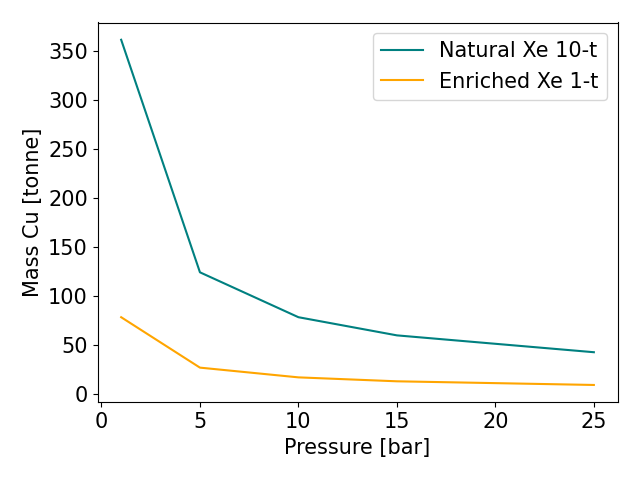

In [10]:
# Plot the number of events interacting in the window vs mass Cu

def CalcMass(det_size):
    rho_Cu   = 8960 # kg/m^3x``
    return rho_Cu * ( (det_size+8e-2)**3 - det_size**3 )

Int_Win_Bi = np.array([287, 2326, 5470, 8766, 15984])

MCu = np.array([6.000, 3.508, 2.784, 2.432, 2.052])
MCu = CalcMass(MCu)

Int_Win_Bi_nat = np.array([1441, 9719,19750,28506,42879])

MCu_nat = np.array([12.92, 7.56, 6, 5.24, 4.42])
MCu_nat = CalcMass(MCu_nat)


plt.figure()
plt.plot(pressures, MCu_nat/1e3, label = "Natural Xe 10-t", color="Teal")
plt.plot(pressures, MCu/1e3, label = "Enriched Xe 1-t", color="Orange")
# plt.semilogy()
plt.xlabel("Pressure [bar]")
# plt.ylabel("Num Int Evts * MCu [gammas * kg]")
plt.ylabel("Mass Cu [tonne]")
plt.legend()
plt.tight_layout()

plt.savefig(f"../../../Projects/Atmospheric TPC/Technical Note/Images/Mass_Copper.pdf")